In [1]:
from PIL import Image
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import imageio
import random
from collections import Counter

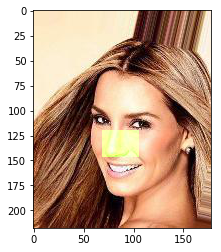

In [2]:
img = io.imread('./img_align_celeba/000001.jpg')
img[120:142+5,69:106,1]=255
# img[,:110,1] = 255 
# img[142:148,77:82,1] = 255
# img[152:158,73:78,1] = 255  
# img[154:158,108:114,1] = 255    
plt.figure()
plt.imshow(img)

In [3]:
a="5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young "
a=a.split(' ')
print(a.index('Eyeglasses'))
# for i in a:
#     print(i)

15


In [4]:
a=open('../Anno/list_attr_celeba.txt').read()
a=a.split('\n')

In [5]:
n=len(a[2].split(' '))-1
gender={}
glass={}
hat={}
count = [0 for i in range(n)]
for i in range(2,len(a)-1):
    st = a[i].split(' ')
#     print(st)
    gender[st[0]] = st[21]
    glass[st[0]]=st[16]
    hat[st[0]] = st[36] 
#     for j in range(n):
#         if st[j+1]=='1':
#             count[j]+=1

In [6]:
# for i in range(n):
#     print(a[1].split(' ')[i],count[i])

In [7]:
b=open('../Anno/list_landmarks_align_celeba.txt').read()
b=b.split('\n')

In [8]:
# color={}
malecoloravg=[]
femalecoloravg=[]
dims={}
count=0
bins = [16*i for i in range(0,5)] + [8*i for i in range(9,33)]
# diff=[]
    
for i in range(2,len(b)-1): #
    line=b[i].split(' ')
    if glass[line[0]] !='1' and hat[line[0]] !='1' :
    #     print(line)
        img = io.imread('./img_align_celeba/'+line[0])
        y1,y2 = int(line[1]),int(line[3])
        x1 = max(int(line[2]),int(line[4])) +7
        x2 = int(line[6])+10
        if abs((y1+y2)/2-int(line[5]))<5 and y2-y1 > 5 and x2-x1>5:
            dims[line[0]] = line[1:]
            mid =int((y1+y2)/2)
            if abs(np.mean(np.sum(img[x1:x2,y1:mid,:],axis=2).flatten()) - np.mean(np.sum(img[x1:x2,mid:y2,:],axis=2).flatten()))<170:
                count+=1
                area=np.array(img[x1:x2,y1:y2,:]).flatten()
                inds = np.digitize(area, bins)
                val =Counter(inds)
                final=[val[i]*1.0/sum(val) for i in range(16)]
#                 print(final)
                if gender[line[0]] =='1':
                    malecoloravg.append([line[0],final])
                else:
                    femalecoloravg.append([line[0],final])

In [9]:
# print(dims['000033.jpg'])
# diff = sorted(diff, key=lambda x: x[1])
# for i in diff:
#     print (i)

In [10]:
# malecoloravg = sorted(malecoloravg, key=lambda x: x[1])
# for i in range(10):
#     print(malecoloravg[i][0])
#     img = io.imread('./img_align_celeba/'+malecoloravg[i][0])
#     plt.figure()
#     plt.imshow(img)

In [11]:
path='./gen/'
from multiprocessing import Pool
def copypaste(imid):
    gencount=0
    i=imid
    lefteye=[]
    righteye=[]
    nose= []
    mouth=[]
    mainimg =io.imread('./img_align_celeba/'+malecoloravg[i][0])
    mainvec =malecoloravg[i][1]
    niter=5
    lefteye_x, lefteye_y, righteye_x, righteye_y, nose_x, nose_y, leftmouth_x, leftmouth_y, rightmouth_x, rightmouth_y = dims[malecoloravg[i][0]]
    lefteye_x, lefteye_y, righteye_x, righteye_y, nose_x, nose_y, leftmouth_x, leftmouth_y, rightmouth_x, rightmouth_y = int(lefteye_x), int(lefteye_y), int(righteye_x), int(righteye_y), int(nose_x), int(nose_y), int(leftmouth_x), int(leftmouth_y), int(rightmouth_x), int(rightmouth_y)
    mouthdiff = rightmouth_x - leftmouth_x
    val=[]
    for j in range(len(malecoloravg)):
        if not(j==i):
            lefteye_x, lefteye_y, righteye_x, righteye_y, nose_x, nose_y, leftmouth_x, leftmouth_y, rightmouth_x, rightmouth_y = dims[malecoloravg[j][0]]
            lefteye_x, lefteye_y, righteye_x, righteye_y, nose_x, nose_y, leftmouth_x, leftmouth_y, rightmouth_x, rightmouth_y = int(lefteye_x), int(lefteye_y), int(righteye_x), int(righteye_y), int(nose_x), int(nose_y), int(leftmouth_x), int(leftmouth_y), int(rightmouth_x), int(rightmouth_y)
            if abs(mouthdiff - (rightmouth_x - leftmouth_x)) <5:
                val.append([malecoloravg[j][0],np.dot(mainvec,malecoloravg[j][1])])

    val = sorted(val, key=lambda x: x[1], reverse=True)
#     print(val)
    for j in range(niter):
        img = io.imread('./img_align_celeba/'+val[j][0])
        lefteye.append(img[lefteye_y-15:lefteye_y+10,lefteye_x-15:lefteye_x+15,:])
        righteye.append(img[righteye_y-15:righteye_y+10,righteye_x-15:righteye_x+15,:])
        nose.append(img[nose_y-15:nose_y+10,nose_x-15:nose_x+15,:])
        mouth.append(img[min(rightmouth_y,leftmouth_y)-5:min(rightmouth_y,leftmouth_y)+15,leftmouth_x-5:leftmouth_x+mouthdiff+5,:])

    for k in range(niter):
        nlefteye = lefteye[random.randint(0,niter-1)]
        nrighteye = righteye[random.randint(0,niter-1)]
        nnose = nose[random.randint(0,niter-1)]
        nmouth = mouth[random.randint(0,niter-1)]
        tmp=mainimg
        lefteye_x, lefteye_y, righteye_x, righteye_y, nose_x, nose_y, leftmouth_x, leftmouth_y, rightmouth_x, rightmouth_y = dims[malecoloravg[i][0]]
        lefteye_x, lefteye_y, righteye_x, righteye_y, nose_x, nose_y, leftmouth_x, leftmouth_y, rightmouth_x, rightmouth_y = int(lefteye_x), int(lefteye_y), int(righteye_x), int(righteye_y), int(nose_x), int(nose_y), int(leftmouth_x), int(leftmouth_y), int(rightmouth_x), int(rightmouth_y)
        tmp[lefteye_y-15:lefteye_y+10,lefteye_x-15:lefteye_x+15,:] = nlefteye
        tmp[righteye_y-15:righteye_y+10,righteye_x-15:righteye_x+15,:] =nrighteye
        tmp[nose_y-15:nose_y+10,nose_x-15:nose_x+15,:]=nnose
        tmp[min(rightmouth_y,leftmouth_y)-5:min(rightmouth_y,leftmouth_y)+15,leftmouth_x-5:rightmouth_x+5,:] = nmouth
#         plt.figure()
#         plt.imshow(tmp)
        imageio.imwrite(path+malecoloravg[i][0][:-4] + str(gencount)+'.jpg', tmp)
        gencount+=1

# copypaste(1)
imgIds = [i for i in range(1000)]#len(malecoloravg)
pool = Pool(processes=20)
pool.map(copypaste,imgIds)   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [12]:
print(count)
print(count*1.0/(len(b)-1))
print(len(malecoloravg))
print(len(femalecoloravg))

95288
0.470323443616
36514
58774
